# Paper plots

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

#### Helper functions

In [2]:
sns.set(font_scale=1.5, rc={'text.usetex' : True, 'figure.figsize':(8,6), 'axes.facecolor': 'whitesmoke'})
teal = '#008080'
violet = '#8601AF'
olive = '#86895E'
orange = '#ED6936'
yellow = '#F1B94E'
lightblue = '#566E86'
pink = '#C9A5B1'
green = '#88AF9B'
terracota = '#A66461'
color_pallette = [teal, violet, olive, orange, yellow, lightblue, pink, green, terracota]

def plt_joint_scatter_plots(curves_results_bsln, curves_results, 
                            curve_results_uncontrained_drop_sensitive, 
                            curve_results_constant_actions, 
                            curve_results_original_actions, 
                            sensitive_binary=True, constant_action_values = [],
                            color_pallette=color_pallette, save_name=None,
                            linewidth = 5, scatter_size=100, alpha=0.6,
                            bbox_to_anchor=(-2.4, -.23), ncol=4, 
                            skip_drop_S=False, skip_const_A=False):

    if sensitive_binary:
        fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4)
    else:
        fig, (ax0, ax1) = plt.subplots(1,2)
    df_curves_bsln = pd.DataFrame(curves_results_bsln)
    df_curves = pd.DataFrame(curves_results)
    df_curves_bsln1_drop_sen = pd.DataFrame(curve_results_uncontrained_drop_sensitive)
    df_curves_bsln3_orig_A = pd.DataFrame(curve_results_original_actions)

    # plot constrained results
    sns.regplot(x='slack', y='utility', data=df_curves, ax=ax0, label=r'\textbf{Ours}', \
        ci=None, scatter_kws={"s": scatter_size}, color=color_pallette[0], line_kws={'alpha':alpha, 'linewidth':linewidth})
    sns.regplot(x='slack', y='constraint', data=df_curves, ax=ax1, label=r'\textbf{Ours}', \
        ci=None, scatter_kws={"s": scatter_size}, color=color_pallette[0], line_kws={'alpha':alpha, 'linewidth':linewidth})
    # plot unconstrained results
    sns.regplot(x='slack', y='utility', data=df_curves_bsln, ax=ax0, label='Unconstrained', \
        ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[1], line_kws={'alpha':alpha, 'linewidth':linewidth})
    sns.regplot(x='slack', y='constraint', data=df_curves_bsln, ax=ax1, label='Unconstrained', \
        ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[1], line_kws={'alpha':alpha, 'linewidth':linewidth})

    # plot baseline 1
    if not skip_drop_S:
        sns.regplot(x='slack', y='utility', data=df_curves_bsln1_drop_sen, ax=ax0, label=r'Drop $S$', \
            ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[2], line_kws={'alpha':alpha, 'linewidth':linewidth}, y_jitter=.1)
        sns.regplot(x='slack', y='constraint', data=df_curves_bsln1_drop_sen, ax=ax1, label=r'Drop $S$', \
            ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[2], line_kws={'alpha':alpha, 'linewidth':linewidth}, y_jitter=.1)

    # plot baseline 3 (original actions)
    sns.regplot(x='slack', y='utility', data=df_curves_bsln3_orig_A, ax=ax0, label=r'$\sigma_A = \emptyset$', \
        ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[3], line_kws={'alpha':alpha, 'linewidth':linewidth})
    sns.regplot(x='slack', y='constraint', data=df_curves_bsln3_orig_A, ax=ax1, label=r'$\sigma_A = \emptyset$', \
        ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[3], line_kws={'alpha':alpha, 'linewidth':linewidth})

    if not skip_const_A:
        # plot baseline 2 (iterate through constant_const_value)
        for i, action_value in enumerate(constant_action_values):
            df_curves_bsln2_constant_values = pd.DataFrame(curve_results_constant_actions[action_value])
            sns.regplot(x='slack', y='utility', data=df_curves_bsln2_constant_values, 
                                        ax=ax0, label=r'Const$A$={}'.format(action_value), ci=None, 
                                        scatter_kws={"s": scatter_size, "alpha": 0}, \
                                            color=color_pallette[4+i], line_kws={'alpha':alpha, 'linewidth':linewidth})
            sns.regplot(x='slack', y='constraint', data=df_curves_bsln2_constant_values, 
                                        ax=ax1, label=r'Const$A$={}'.format(action_value), ci=None, 
                                        scatter_kws={"s": scatter_size, "alpha": 0}, \
                                            color=color_pallette[4+i], line_kws={'alpha':alpha, 'linewidth':linewidth})

    ax0.set(ylabel=r'\textbf{Utility}', xlabel=r'\textbf{Slack value}')
    ax1.set(ylabel=r'\textbf{Constraint}', xlabel=r'\textbf{Slack value}')
    if sensitive_binary:
        # plot constrained results
        sns.regplot(x='slack', y='utility_group0', data=df_curves, ax=ax2, label=r'\textbf{Ours}', \
            ci=None, scatter_kws={"s": scatter_size}, color=color_pallette[0], line_kws={'alpha':alpha, 'linewidth':linewidth})
        sns.regplot(x='slack', y='utility_group1', data=df_curves, ax=ax3, label=r'\textbf{Ours}', \
            ci=None, scatter_kws={"s": scatter_size}, color=color_pallette[0], line_kws={'alpha':alpha, 'linewidth':linewidth})
        # plot unconstrained results
        sns.regplot(x='slack', y='utility_group0', data=df_curves_bsln, ax=ax2, label='Unconstrained', \
            ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[1], line_kws={'alpha':alpha, 'linewidth':linewidth})
        sns.regplot(x='slack', y='utility_group1', data=df_curves_bsln, ax=ax3, label='Unconstrained', \
            ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[1], line_kws={'alpha':alpha, 'linewidth':linewidth})

        # plot baseline 1
        if not skip_drop_S:
            sns.regplot(x='slack', y='utility_group0', data=df_curves_bsln1_drop_sen, ax=ax2, label=r'Drop $S$', \
                ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[2], line_kws={'alpha':alpha, 'linewidth':linewidth}, y_jitter=.1)
            sns.regplot(x='slack', y='utility_group1', data=df_curves_bsln1_drop_sen, ax=ax3, label=r'Drop $S$', \
                ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[2], line_kws={'alpha':alpha, 'linewidth':linewidth}, y_jitter=.1)

        # plot baseline 3 (original actions)
        sns.regplot(x='slack', y='utility_group0', data=df_curves_bsln3_orig_A, ax=ax2, label=r'$\sigma_A = \emptyset$', \
            ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[3], line_kws={'alpha':alpha, 'linewidth':linewidth})
        sns.regplot(x='slack', y='utility_group1', data=df_curves_bsln3_orig_A, ax=ax3, label=r'$\sigma_A = \emptyset$', \
            ci=None, scatter_kws={"s": scatter_size, "alpha": 0}, color=color_pallette[3], line_kws={'alpha':alpha, 'linewidth':linewidth})

        if not skip_const_A:
            # plot baseline 2 (iterate through constant_const_value)
            for i, action_value in enumerate(constant_action_values):
                df_curves_bsln2_constant_values = pd.DataFrame(curve_results_constant_actions[action_value])
                sns.regplot(x='slack', y='utility_group0', data=df_curves_bsln2_constant_values, 
                                            ax=ax2, label=r'Const$A$={}'.format(action_value), ci=None, 
                                            scatter_kws={"s": scatter_size, "alpha": 0}, \
                                                color=color_pallette[4+i], line_kws={'alpha':alpha, 'linewidth':linewidth})
                sns.regplot(x='slack', y='utility_group1', data=df_curves_bsln2_constant_values, 
                                            ax=ax3, label=r'Const$A$={}'.format(action_value), ci=None, 
                                            scatter_kws={"s": scatter_size, "alpha": 0}, \
                                                color=color_pallette[4+i], line_kws={'alpha':alpha, 'linewidth':linewidth})

    ax2.set(ylabel=r'\textbf{Utility S=0}', xlabel=r'\textbf{Slack value}')
    ax3.set(ylabel=r'\textbf{Utility S=1}', xlabel=r'\textbf{Slack value}')

    plt.tight_layout()
    leg = plt.legend(loc='center', bbox_to_anchor=bbox_to_anchor,
        fancybox=True, shadow=True, ncol=ncol)
    for lh in leg.legendHandles: 
        lh.set_alpha(alpha)    
    if save_name:
        plt.savefig(save_name, format='pdf', bbox_inches="tight")

In [27]:
def final_action_histogram(output_A_last_unconst, output_A_last_small_slack, alpha=0.8, save_name=None):
    fig, (ax0, ax1) = plt.subplots(2,1)
    ax0.hist(output_A_last_unconst[output_A_last_unconst['sensitive']==1]['pred_A'], label=r'\textbf{S=1}', alpha=alpha, color=color_pallette[1])
    ax0.hist(output_A_last_unconst[output_A_last_unconst['sensitive']==0]['pred_A'], label=r'\textbf{S=0}', alpha=alpha, color=color_pallette[0])
    ax0.set_ylabel(r'\textbf{Count}')
    ax0.legend()
    ax0.set_title(r'\textbf{Unconstrained}')
    
    ax1.hist(output_A_last_small_slack[output_A_last_small_slack['sensitive']==1]['pred_A'], label=r'\textbf{S=1}', alpha=alpha, color=color_pallette[1])
    ax1.hist(output_A_last_small_slack[output_A_last_small_slack['sensitive']==0]['pred_A'], label=r'\textbf{S=0}', alpha=alpha, color=color_pallette[0])
    ax1.set_xlabel(r'\textbf{Action values}')
    ax1.set_ylabel(r'\textbf{Count}')
    ax1.set_title(r'\textbf{Constrained}')
    if save_name:
        plt.savefig(save_name, format='pdf', bbox_inches="tight")
    

#### Moderation Breaking Experiments

NYC Schools

In [7]:
NYCcurve_results_constant_actions = {}
NYCdf_curves_slacks = pd.read_csv('NYC_ModBrk/df_curves_1_epochs.csv')
NYCcurves_results_bsln = pd.read_csv('NYC_ModBrk/df_curves_bsln_1_epochs.csv')
NYCcurve_results_constant_actions[0] = pd.read_csv('NYC_ModBrk/df_curves_bsln2_constant_values_actval_0_1_epochs.csv')
NYCcurve_results_constant_actions[0.3] = pd.read_csv('NYC_ModBrk/df_curves_bsln2_constant_values_actval_0.3_1_epochs.csv')
NYCcurve_results_constant_actions[0.6] = pd.read_csv('NYC_ModBrk/df_curves_bsln2_constant_values_actval_0.6_1_epochs.csv')
NYCcurve_results_constant_actions[0.9] = pd.read_csv('NYC_ModBrk/df_curves_bsln2_constant_values_actval_0.9_1_epochs.csv')
NYCcurve_results_constant_actions[1] = pd.read_csv('NYC_ModBrk/df_curves_bsln2_constant_values_actval_1_1_epochs.csv')
NYCcurve_results_uncontrained_drop_sensitive = pd.read_csv('NYC_ModBrk/df_curves_uncontrained_drop_sensitive_1_epochs.csv')
NYCcurve_results_original_actions = pd.read_csv('NYC_ModBrk/df_curves_bsln3_orig_A_1_epochs.csv')

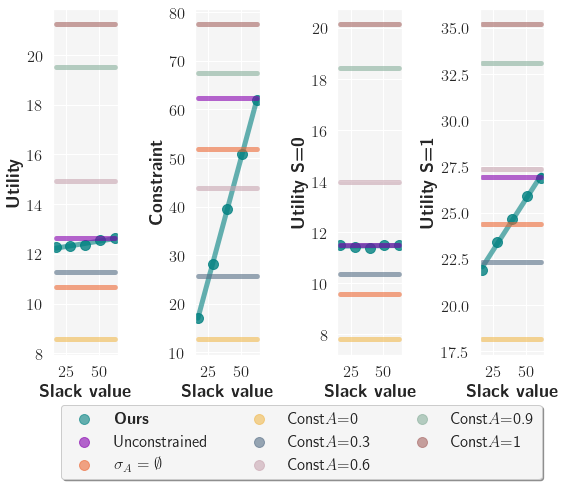

In [73]:
sns.set(font_scale=1.5, rc={'text.usetex' : True, 'figure.figsize':(8,6), 'axes.facecolor': 'whitesmoke'})
plt_joint_scatter_plots(NYCcurves_results_bsln, NYCdf_curves_slacks, 
                            NYCcurve_results_uncontrained_drop_sensitive, 
                            NYCcurve_results_constant_actions, 
                            NYCcurve_results_original_actions, 
                            sensitive_binary=True,
                            constant_action_values = NYCcurve_results_constant_actions.keys(),
                            save_name='NYC_ModBrk_slack_vary.pdf', bbox_to_anchor=(-2.75, -.25), 
                            ncol=3, skip_drop_S=True)

In [28]:
output_A_last_unconst = pd.read_csv('NYC_ModBrk/unconst_output_A_df_last.csv')
output_A_last_small_slack = pd.read_csv('NYC_ModBrk/slack17_output_A_df_last.csv')

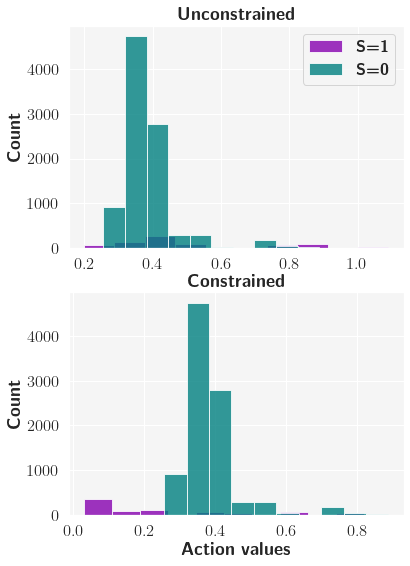

In [29]:
sns.set(font_scale=1.5, rc={'text.usetex' : True, 'figure.figsize':(6,9), 'axes.facecolor': 'whitesmoke'})
final_action_histogram(output_A_last_unconst, output_A_last_small_slack, save_name='NYC_ModBrk_A_hist.pdf')

IHDP

In [14]:
IHDPcurve_results_constant_actions = {}
IHDPdf_curves_slacks = pd.read_csv('IHDP_ModBrk/df_curves_1_epochs.csv')
IHDPcurves_results_bsln = pd.read_csv('IHDP_ModBrk/df_curves_bsln_1_epochs.csv')
IHDPcurve_results_constant_actions[0] = pd.read_csv('IHDP_ModBrk/df_curves_bsln2_constant_values_actval_0_1_epochs.csv')
IHDPcurve_results_constant_actions[3] = pd.read_csv('IHDP_ModBrk/df_curves_bsln2_constant_values_actval_3_1_epochs.csv')
IHDPcurve_results_constant_actions[5] = pd.read_csv('IHDP_ModBrk/df_curves_bsln2_constant_values_actval_5_1_epochs.csv')
IHDPcurve_results_constant_actions[7] = pd.read_csv('IHDP_ModBrk/df_curves_bsln2_constant_values_actval_7_1_epochs.csv')
IHDPcurve_results_uncontrained_drop_sensitive = pd.read_csv('IHDP_ModBrk/df_curves_uncontrained_drop_sensitive_1_epochs.csv')
IHDPcurve_results_original_actions = pd.read_csv('IHDP_ModBrk/df_curves_bsln3_orig_A_1_epochs.csv')

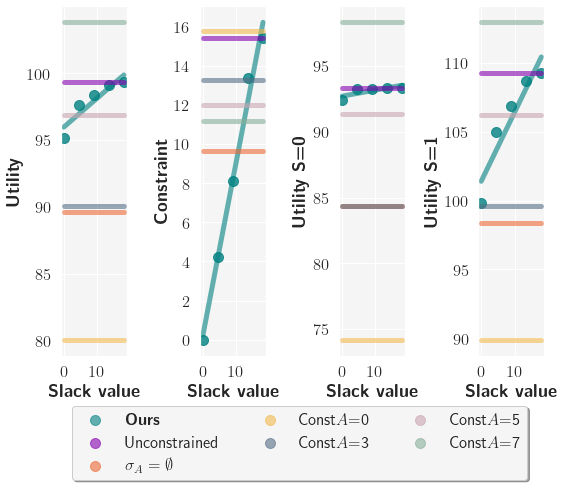

In [72]:
sns.set(font_scale=1.5, rc={'text.usetex' : True, 'figure.figsize':(8,6), 'axes.facecolor': 'whitesmoke'})
plt_joint_scatter_plots(IHDPcurves_results_bsln, IHDPdf_curves_slacks, 
                            IHDPcurve_results_uncontrained_drop_sensitive, 
                            IHDPcurve_results_constant_actions, 
                            IHDPcurve_results_original_actions, 
                            sensitive_binary=True,
                            constant_action_values = IHDPcurve_results_constant_actions.keys(),
                            save_name='IHDP_ModBrk_slack_vary.pdf',
                            bbox_to_anchor=(-2.7, -.25), ncol=3, skip_drop_S=True)

In [30]:
IHDPoutput_A_last_unconst = pd.read_csv('IHDP_ModBrk/unconst_output_A_df_last.csv')
IHDPoutput_A_last_small_slack = pd.read_csv('IHDP_ModBrk/slack0.001_output_A_df_last.csv')

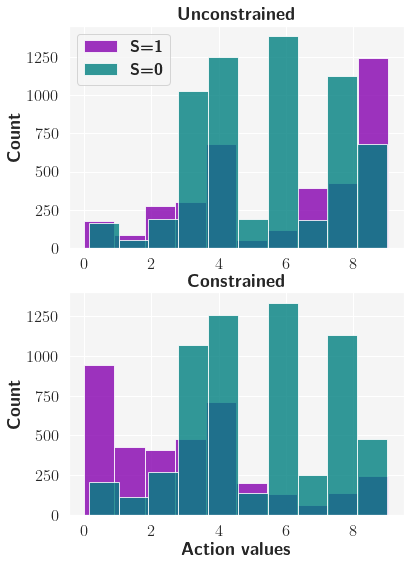

In [35]:
sns.set(font_scale=1.5, rc={'text.usetex' : True, 'figure.figsize':(6,9), 'axes.facecolor': 'whitesmoke'})
final_action_histogram(IHDPoutput_A_last_unconst, IHDPoutput_A_last_small_slack, save_name='IHDP_ModBrk_A_hist.pdf')

#### EqB constraint experiments

NYC Schools

In [5]:
NYC_EqB_curve_results_constant_actions = {}
NYC_EqB_df_curves_slacks = pd.read_csv('NYC_EqB/df_curves_1_epochs.csv')
NYC_EqB_curves_results_bsln = pd.read_csv('NYC_EqB/df_curves_bsln_1_epochs.csv')
NYC_EqB_curve_results_constant_actions[0] = pd.read_csv('NYC_EqB/df_curves_bsln2_constant_values_actval_0_1_epochs.csv')
NYC_EqB_curve_results_constant_actions[0.3] = pd.read_csv('NYC_EqB/df_curves_bsln2_constant_values_actval_0.3_1_epochs.csv')
NYC_EqB_curve_results_uncontrained_drop_sensitive = pd.read_csv('NYC_EqB/df_curves_uncontrained_drop_sensitive_1_epochs.csv')
NYC_EqB_curve_results_original_actions = pd.read_csv('NYC_EqB/df_curves_bsln3_orig_A_1_epochs.csv')

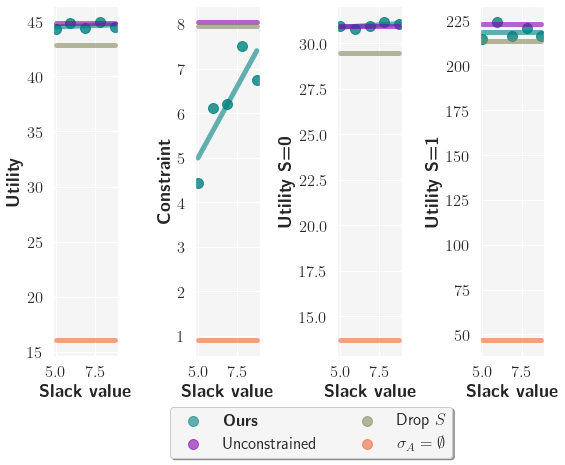

In [7]:
sns.set(font_scale=1.5, rc={'text.usetex' : True, 'figure.figsize':(8,6), 'axes.facecolor': 'whitesmoke'})
plt_joint_scatter_plots(NYC_EqB_curves_results_bsln, NYC_EqB_df_curves_slacks, 
                            NYC_EqB_curve_results_uncontrained_drop_sensitive,
                            NYC_EqB_curve_results_constant_actions, 
                            NYC_EqB_curve_results_original_actions, 
                            sensitive_binary=True,
                            constant_action_values = NYC_EqB_curve_results_constant_actions.keys(),
                            save_name='NYC_EqB_slack_vary.pdf',
                            bbox_to_anchor=(-2.6, -.22), ncol=2, skip_const_A=True)

In [69]:
NYC_EqB_output_A_last_unconst = pd.read_csv('NYC_EqB/unconst_output_A_df_last.csv')
NYC_EqB_output_A_last_small_slack = pd.read_csv('NYC_EqB/slack5_output_A_df_last.csv')

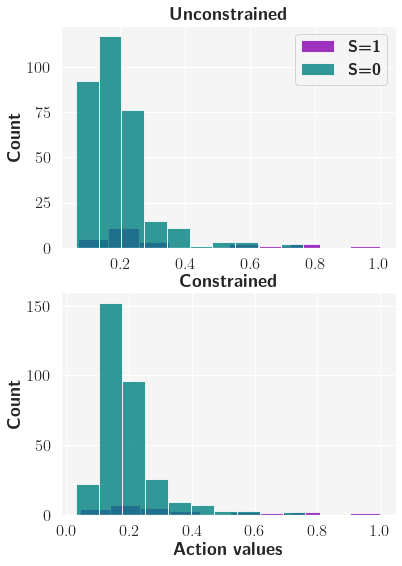

In [70]:
sns.set(font_scale=1.5, rc={'text.usetex' : True, 'figure.figsize':(6,9), 'axes.facecolor': 'whitesmoke'})
final_action_histogram(NYC_EqB_output_A_last_unconst, \
    NYC_EqB_output_A_last_small_slack, save_name='NYC_EqB_A_hist.pdf')